In [4]:
import numpy as np  
import matplotlib.pyplot as plt  
from sklearn.cluster import KMeans
import pandas as pd
import matplotlib as mpl
from scipy.spatial.distance import cdist
from sklearn import metrics        
mpl.rcParams['font.sans-serif'] = [u'SimHei']          
mpl.rcParams['axes.unicode_minus'] = False   
#从磁盘读取城市经纬度数据  
X = []  
f = open('city.txt')  
for v in f:
    X.append([float(v.split(',')[1]),float(v.split(',')[2])])
f.close()
X = np.array(X)


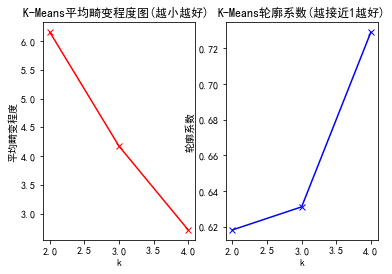

In [5]:
n_clusters = range(2,5) 
meandistortions=[]
metrics_silhouette=[]
for k in n_clusters:
    clf=KMeans(n_clusters=k)
    cls = clf.fit(X)
    meandistortions.append(sum(np.min(cdist(X,clf.cluster_centers_,'euclidean'),axis=1))/X.shape[0])
    metrics_silhouette.append(metrics.silhouette_score(X,clf.labels_,metric='euclidean'))           
#平均畸变程度图   
plt.subplot(121)
plt.plot(n_clusters,meandistortions,'rx-')
plt.xlabel('k')
plt.ylabel('平均畸变程度')
plt.title('K-Means平均畸变程度图(越小越好) ')
#轮廓系数图
plt.subplot(122)
plt.plot(n_clusters,metrics_silhouette,'bx-')
plt.ylabel('轮廓系数')
plt.xlabel('k')
plt.title('K-Means轮廓系数(越接近1越好)')
#显示
plt.show()